In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
data = pd.read_csv('listings_tot.csv')
data['host_since'] = pd.to_datetime(data['host_since'], format="%Y-%m-%d")
data['host_timing']=np.ones(len(data))
list_count = data.host_timing.groupby(data.host_since).sum()

/home/biel/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Creixement de listings

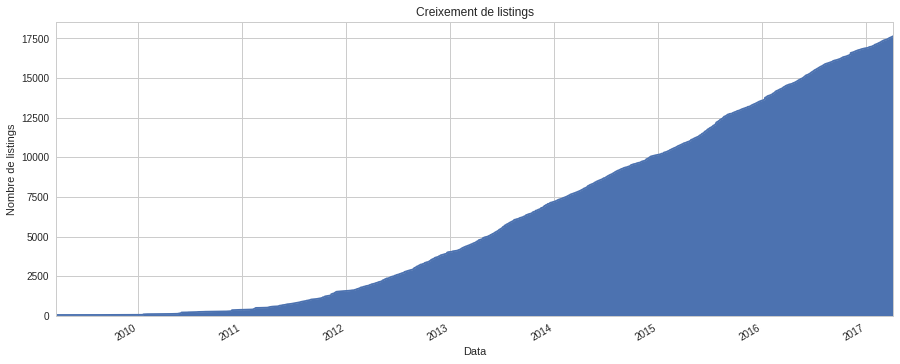

In [5]:
list_grow = list_count.cumsum()
list_grow.plot(kind='area')
plt.title('Creixement de listings')
plt.ylabel('Nombre de listings')
plt.xlabel('Data')

# Creixement de hostings

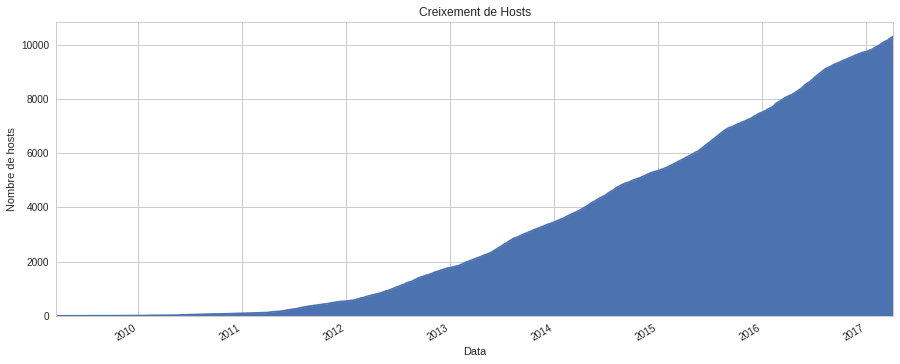

In [7]:
host_grow = data[['host_since', 'host_id']]
host_grow = host_grow.drop_duplicates(['host_id'])
host_grow['counts'] = np.ones(len(host_grow))

host_grow.sort_values(['host_since'], inplace=True)
host_grow=host_grow.reset_index(drop=True)

host_grow = host_grow.counts.groupby(host_grow.host_since).sum()
host_grow = host_grow.cumsum()

host_grow.plot(kind='area')
plt.title('Creixement de Hosts')
plt.ylabel('Nombre de hosts')
plt.xlabel('Data')

# Listings vs hostings

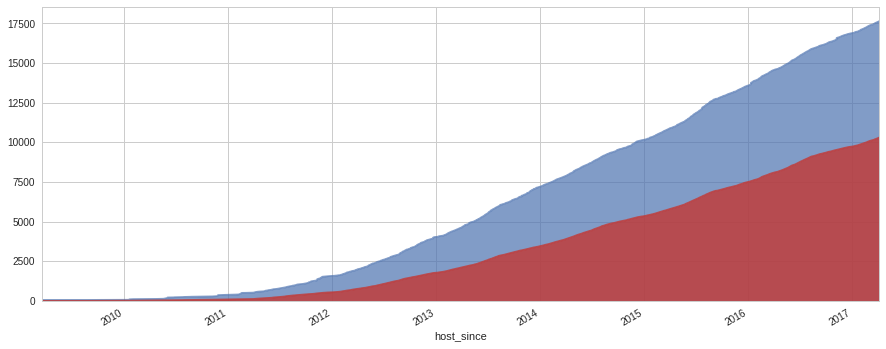

In [8]:
list_grow.plot(kind='area', alpha=0.7)
host_grow.plot(kind='area', alpha=0.8, color='#c43733')

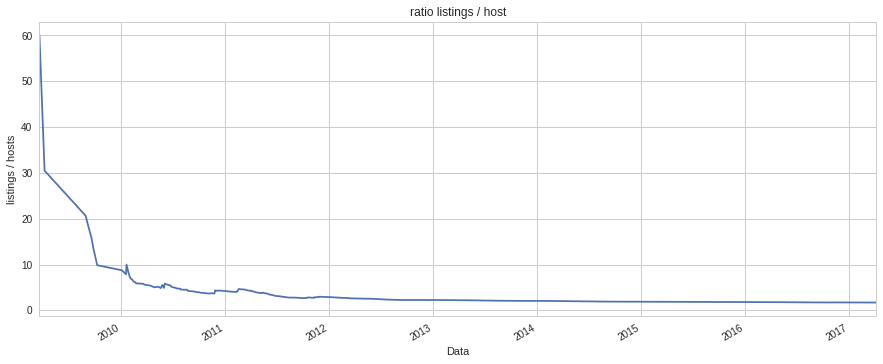

In [9]:
ratio = list_grow/host_grow

ratio.plot()
plt.title('ratio listings / host')
plt.ylabel('listings / hosts')
plt.xlabel('Data')

# Estacionalitat de les dades

## Listings

/home/biel/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


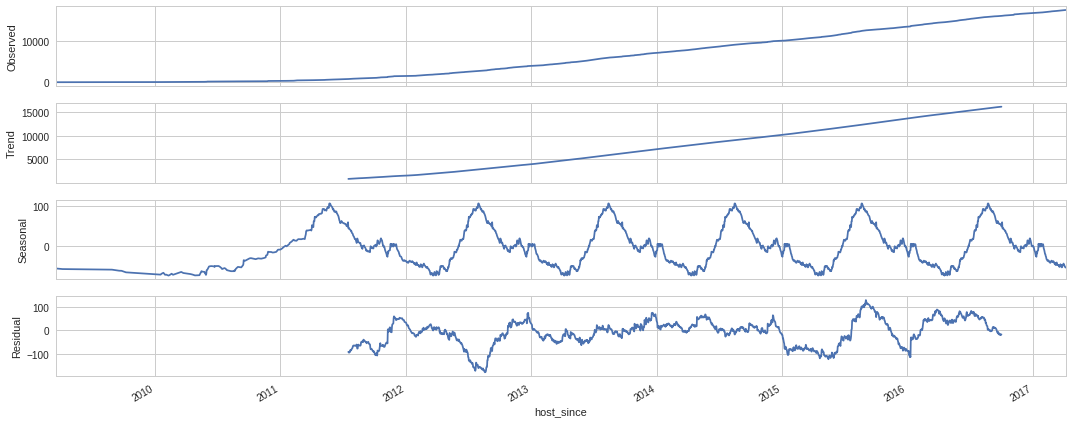

In [12]:
decomposition = seasonal_decompose(list_grow, freq=365)  
fig = plt.figure()  
fig = decomposition.plot()

## Hostings

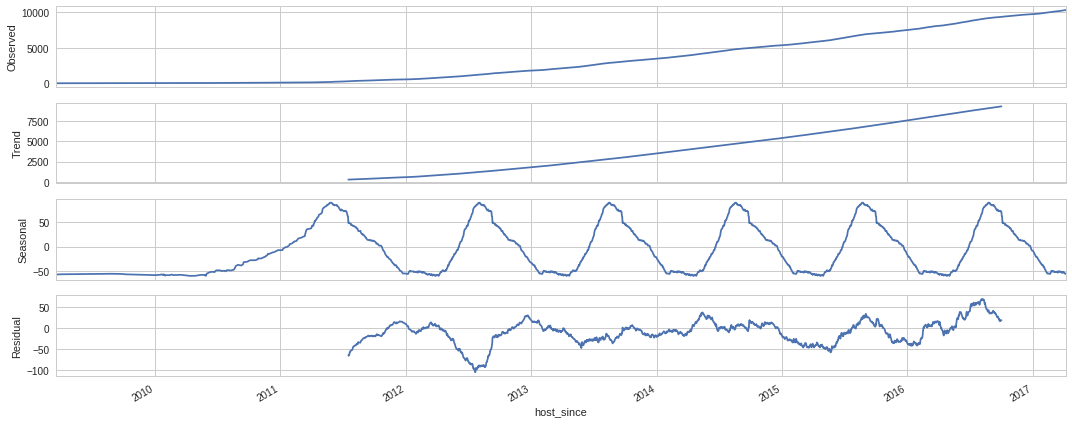

In [13]:
decomposition = seasonal_decompose(host_grow, freq=365)#frequència anual
fig = plt.figure()  
fig = decomposition.plot()